プログラム001~004までのプログラムをまとめている

In [1]:
import sqlite3
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
def NetworkX(df):
    G = nx.DiGraph()

    # ノードを追加
    nodes = df.columns
    for node in nodes:
        G.add_node(node)

    # エッジを追加
    for i in range(len(nodes)):
        for j in range(len(nodes)):
            if df.iloc[i, j] == 1:
                G.add_edge(nodes[i], nodes[j])

    # ネットワーク図を描画
    pos = nx.spring_layout(G)  # レイアウトを設定
    nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue', font_size=10, font_color='black', arrowsize=20)
    plt.title("Network Graph")
    plt.show()


def SQL_SetUp(database_path):
    conn = sqlite3.connect(database_path)
    cursor = conn.cursor()

    # データベースファイルが存在する場合は処理を終了
    cursor.execute("SELECT name FROM sqlite_master WHERE type='table'")
    existing_tables = cursor.fetchall()
    if existing_tables:
        print("Database already exists. Exiting setup.")
        conn.close()
        return

    # テーブルを作成
    cursor.execute('''
        CREATE TABLE knowledge (
            id INTEGER PRIMARY KEY AUTOINCREMENT,
            data TEXT,
            Adata INTEGER,
            Bdata INTEGER,
            Cdata INTEGER,
            Ddata INTEGER,
            Edata INTEGER,
            Fdata INTEGER
        )
    ''')

    # 配列の定義   
    data = [["Adata",0, 1, 1, 0, 0, 0],
            ["Bdata",1, 0, 1, 1, 1, 0],
            ["Cdata",1, 1, 0, 0, 0, 1],
            ["Ddata",0, 1, 0, 0, 0, 0],
            ["Edata",0, 1, 0, 0, 0, 0],
            ["Fdata",0, 0, 1, 0, 0, 0]]
    
    # データを挿入
    cursor.executemany("INSERT INTO knowledge (data, Adata, Bdata, Cdata, Ddata, Edata, Fdata) VALUES (?, ?, ?, ?, ?, ?, ?)", data)

    conn.commit()
    conn.close()


def SQL_GetData(database_path):
    conn = sqlite3.connect(database_path)
    cursor = conn.cursor()

    # データを取得してDataFrameに格納
    cursor.execute("SELECT * FROM knowledge")
    rows = cursor.fetchall()
    columns = [description[0] for description in cursor.description]
    df = pd.DataFrame(rows, columns=columns)

    conn.close()

    # "data"列をデータフレームのインデックスに設定
    df.set_index("data", inplace=True)
    # 不要な"id"列を削除
    df.drop("id", axis=1, inplace=True)

    return df


Database already exists. Exiting setup.
       Adata  Bdata  Cdata  Ddata  Edata  Fdata
data                                           
Adata      0      1      1      0      0      0
Bdata      1      0      1      1      1      0
Cdata      1      1      0      0      0      1
Ddata      0      1      0      0      0      0
Edata      0      1      0      0      0      0
Fdata      0      0      1      0      0      0


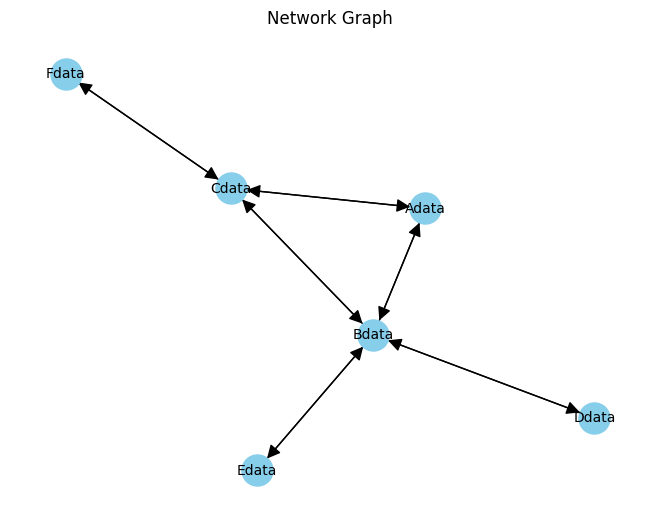

In [6]:
# データベースのセットアップ
SQL_SetUp("database_v01.sqlite")

# データの取得
df = SQL_GetData("database_v01.sqlite")

# データの表示
print(df)

# データの可視化
NetworkX(df)